# Calculating time scales for *cis/trans* isomerization


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd

## Load Important Function

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

In [ ]:
def omega2cistrans(omega):
    """Converts a sequence of float omega angles (in degrees) to an array of ints: 0 cis and 1 trans."""
    # Convert each element in omega to shifted_omega
    shifted_omega = [(arr + 90.0) % 360.0 - 90.0 for arr in omega]
    
    # Convert to cis/trans (0 = cis, 1 = trans) using np.where
    cistrans = [np.where(arr > 90.0, 1, 0).astype(int) for arr in shifted_omega]
    return cistrans


## Load in the omega angle trajectories by result

In [10]:
# Parameters
residues_to_plot = [0, 1, 2]  # Residues to plot
num_residues = len(residues_to_plot)

omegas_by_result = []  # To store processed omega data
save_dir = 'omega_data'
all_omega = Data.load(f"{save_dir}/data.pkl").array_list  # This is an (742, x, 3) array


In [11]:
# Plot omega angles for the selected residues
for i, shifted_omega in enumerate(omegas_by_result):
    nsnaps, res = shifted_omega.shape  # Get number of snapshots and residues

    plt.figure(figsize=(10, 2))  # Create a figure for each replica
    start = 0

    # Plot each residue
    for panel, residue in enumerate(residues_to_plot, 1):
        plt.subplot(len(residues_to_plot), 1, panel)
        t = np.arange(start, nsnaps) * 0.010  # Time axis in ns
        plt.plot(t, shifted_omega[start:nsnaps, residue], '.', ms=1)
        plt.xlabel('time (ns)')
        plt.ylabel(f'$\\omega$ res {residue} (deg)')
        plt.title(f'Omega angles vs Time for residue {residue} (replica {i}) in 19AE1-4-A')

    plt.tight_layout()  # Adjust layout
    #plt.show()

In [14]:
print(len(all_omega)) 

all_omega[0].shape
all_omega[0]

742


array([[-173.65106  ,    8.187268 ,  158.7122   ],
       [ 149.942    ,   -5.472654 , -179.34113  ],
       [ 162.98587  ,    2.9294653, -170.57141  ],
       ...,
       [ -25.63846  ,    6.4290886, -142.46432  ],
       [  -1.3674331,   47.98817  , -169.6922   ],
       [ -16.094692 ,   27.522018 ,  177.88043  ]], dtype=float32)

In [18]:
# This a list of 742 (N_i, 3) np.arrays, where N_i is the size of the i^{th} trajectory
all_cistrans = omega2cistrans(all_omega)

all_cistrans[0].shape
all_cistrans[0]


array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

#### compile transition probabilities as a function of lag time (in steps)

In [8]:
def get_transition_matrix(cistrans_traj, lagtime=10, sliding_window=True, pseudocount=0.25):
    """Returns a row-normalized transiton matrix T for a given lagtime (in steps)."""

    C = np.zeros( (2,2) )   # count matrix
    T = np.zeros( (2,2) )   # transition matrix
    
    N = len(cistrans_traj)  # the length of the trajectory
    for t in range(0, N-lagtime):
        C[cistrans_traj[t],cistrans_traj[t+lagtime]] += 1.0

    # add pseudocounts to avoid zero entries
    C += pseudocount    
    
    # row-normalize
    T[0,:] = C[0,:]/C[0,:].sum()
    T[1,:] = C[1,:]/C[1,:].sum()

    return T

def implied_timesale(T, lagtime=1):
    """Return the implied timescale, in units of number of steps.
    
    INPUT
    T       - transition matrix where T_ij is prob of transitioning i -> j in lagtime.
    
    PARAMETERS
    lagtime - lagtime used to build T (in units of steps). Default = 1
    
    RETURN
    t2      - the implied timescale (in units of steps)
    """
    try:
        evals = np.linalg.eigvals( T.transpose() )  # will be something like [0.99754545 1.        ]
        mu2 = min(evals) # non-stational eigenvalue of T
        # print('mu2', mu2, 'evals', evals, 'T', T)
        t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation
    except:
        t2 = np.nan
        
    return t2
    

## Let's make an implied timescale plot for each omega angle

lagtimes = [1, 10, 25, 50, 100, 5100, 10100, 15100, 20100, 25100, 30100, 35100, 40100, 45100, 50100, 55100, 60100, 65100, 70100, 75100]


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_39431/3359252332.py:36: RuntimeWarning: invalid value encountered in log
  t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation


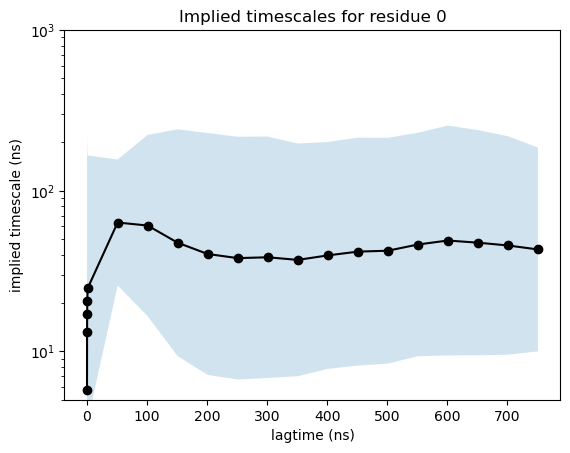

lagtimes = [1, 10, 25, 50, 100, 5100, 10100, 15100, 20100, 25100, 30100, 35100, 40100, 45100, 50100, 55100, 60100, 65100, 70100, 75100]


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_39431/3359252332.py:36: RuntimeWarning: invalid value encountered in log
  t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation


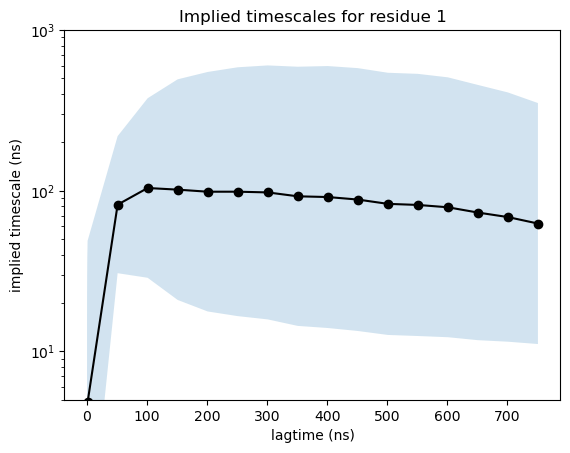

lagtimes = [1, 10, 25, 50, 100, 5100, 10100, 15100, 20100, 25100, 30100, 35100, 40100, 45100, 50100, 55100, 60100, 65100, 70100, 75100]


/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_39431/3359252332.py:36: RuntimeWarning: invalid value encountered in log
  t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation


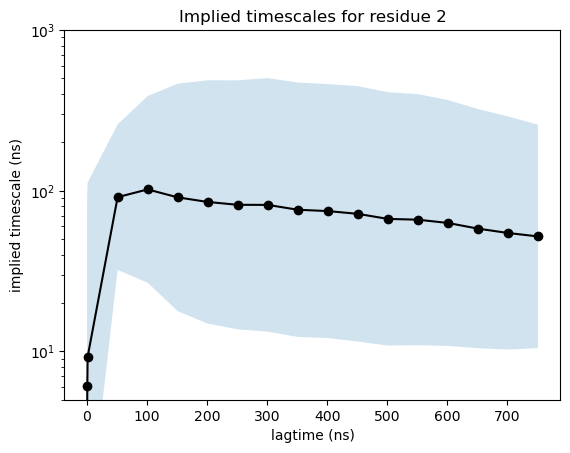

In [10]:
dt_in_ns = 0.01
residues = [0,1,2]
n_result = len(all_omega) # 742 run 

for residue in residues:
    
    lagtimes = [1, 10, 25, 50] + list(range(100, 80000, 5000))
    print('lagtimes =', lagtimes)
    
    t2_means = []  # mean timescales for each lagtime
    t2_uppers  = []  # upperlim of standard deviation of log t2 for each lagtime
    t2_lowers  = []  # lowerlim
    
    for lagtime in lagtimes:
    
        # Each replica is a separate data set we can use for uncertainty estimation
        logt2_values = []    
        for i in range(n_result):
            T = get_transition_matrix(cistrans_by_replica[i][:,residue], lagtime=lagtime)
            logt2_values.append(np.log(implied_timesale(T, lagtime=lagtime)))
        logt2_values = np.array(logt2_values)    
        Ind = ~np.isnan(logt2_values)
        t2_means.append( np.exp(np.mean(logt2_values[Ind] ) ))
        t2_uppers.append( np.exp( np.mean(logt2_values[Ind] ) + np.std(logt2_values[Ind]) ))
        t2_lowers.append( np.exp( np.mean(logt2_values[Ind] ) - np.std(logt2_values[Ind]) ))
    
    t2_means = np.array(t2_means)
    t2_uppers = np.array(t2_uppers)
    t2_lowers = np.array(t2_lowers)
    lagtimes  = np.array(lagtimes)
    
    plt.figure()
    plt.plot(lagtimes*dt_in_ns, t2_means*dt_in_ns, 'ko-')
    plt.fill_between(lagtimes*dt_in_ns, t2_uppers*dt_in_ns, t2_lowers*dt_in_ns, alpha=0.2)
    plt.xlabel('lagtime (ns)')
    plt.ylabel('implied timescale (ns)')
    plt.ylim(5,1000)
    plt.yscale('log')
    plt.title(f'Implied timescales for residue {residue}')
    plt.show()
    